<a href="https://colab.research.google.com/github/keirkwame/axionEmu/blob/main/Open_access_of_2e5_emulator_NN_tt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

# setting the seed for reproducibility
with tf.device('/device:GPU:1'):
    import math as mh
    import numpy as np
    import matplotlib.pyplot as plt
    import os
    np.random.seed(2)
    tf.random.set_seed(4)

#from google.colab import drive
#drive.mount('/content/drive')

In [2]:
with tf.device('/device:GPU:1'):
    model_parameters = ['h', 
                        'tau_reio', 
                        'omega_b', 
                        'n_s', 
                        'ln10A_s', 
                        'omega_cdm',
                        'log10ma',
                        'omega_ax' 
                        ]

In [ ]:
np.linspace(0,28,15)

In [3]:
with tf.device('/device:GPU:1'):
    import pickle
    collection_list = []
    for i in np.linspace(0, 59, 60): #28,15):
        #f = open('/home/anran/axionCAMB/test_data_collect_9params_5e5_mp_test_'+str(int(i))+'.pkl', 'rb')
        f = open('/home/keir/Software/axionEmu/data_collection_axion/test_data_collect_HMcode_NL_200k_fixh2_'+str(int(i))+'.pkl', 'rb')
        collection = pickle.load(f)
        f.close()
        print(len(collection['C_te']))
        collection_list.append(collection)

    import random
    random.shuffle(collection_list)

2951
2928
2962
2948
2957
2950
2975
2954
2961
2952
2956
2974
2951
2990
2942
2967
2944
2945
2933
2963
2991
2975
2945
2945
2977
2947
2974
2976
2957
2983
2938
2959
2945
2966
2957
2958
2976
2965
2935
2952
2939
2940
2985
2973
2969
2983
2975
2971
2954
2986
2955
2942
2960
2926
2975
2990
2926
2987
2927
2968


In [ ]:
import pickle
for i in np.linspace(0,28,15):
    f = open('/home/anran/axionCAMB/test_data_collect_9params_5e5_mp_test_'+str(int(i)+30)+'.pkl', 'rb')
    collection = pickle.load(f)
    f.close()
    print(len(collection['C_tt']))
    collection_list.append(collection)
    
import random
random.shuffle(collection_list)

In [ ]:
print(len(collection_list[0]['params']['omega_b']))
print(len(collection_list))
print(collection_list[0]['params'].keys())
print(collection_list[0].keys())
print(collection_list[0]['l_index'][0])


In [4]:
with tf.device('/device:GPU:1'):
#import numpy as np
    parameters_list = {}
    for key in collection['params']:
        parameters_list[key] = np.array([])

    C_list = []

    for i in range(60):
        para = collection_list[i]['params']
        C_list.extend(collection_list[i]['C_te'])
        for key in para:
          parameters_list[key] = np.concatenate((parameters_list[key], para[key]))

    ell_range = np.linspace(2,6000, 5999)
    spectra_= np.array(C_list)[:,:ell_range.shape[0]]/(7.4311*10**(12)) #/(ell_range*(ell_range+1)/(2.*np.pi))
    print(spectra_.shape)

    #Remove nan spectra
    spectra_bool = np.array(np.sum(~np.isfinite(spectra_), axis=1), dtype=bool)
    print(spectra_bool)
    spectra_ = spectra_[~spectra_bool, :]
    for key in parameters_list.keys():
        parameters_list[key] = parameters_list[key][~spectra_bool]
        print(parameters_list[key].shape)
    print(spectra_.shape)

    cut_off = 160000 #65000 #108000
    import copy
    training_parameters_ = copy.deepcopy(parameters_list)
    h_0 = training_parameters_['H_0'][:cut_off]/100
    ln10_10A_s = np.log(training_parameters_['A_s'][:cut_off]*10**10)
    ma_mass = np.array(training_parameters_['ma'][:cut_off]*10**32,dtype='float64')
    ma_mass = np.log10(ma_mass)
    training_parameters = dict()
    training_parameters['omega_b'] = training_parameters_['omega_b'][:cut_off]
    training_parameters['omega_cdm'] = training_parameters_['omega_cdm'][:cut_off]
    training_parameters['h'] = h_0
    training_parameters['tau_reio'] = training_parameters_['tau_reio'][:cut_off]
    training_parameters['n_s'] = training_parameters_['n_s'][:cut_off]
    training_parameters['ln10A_s'] = ln10_10A_s
    training_parameters['log10ma'] = ma_mass
    training_parameters['omega_ax'] = training_parameters_['omega_ax'][:cut_off]

    test_parameters_ = copy.deepcopy(parameters_list)
    h_0 = test_parameters_['H_0'][cut_off:]/100
    ln10_10A_s = np.log(test_parameters_['A_s'][cut_off:]*10**10)
    ma_mass = np.array(test_parameters_['ma'][cut_off:]*10**32, dtype = 'float64')
    ma_mass = np.log10(ma_mass)
    test_parameters = dict()
    test_parameters['omega_b'] = test_parameters_['omega_b'][cut_off:]
    test_parameters['omega_cdm'] = test_parameters_['omega_cdm'][cut_off:]
    test_parameters['h'] = h_0
    test_parameters['tau_reio'] = test_parameters_['tau_reio'][cut_off:]
    test_parameters['n_s'] = test_parameters_['n_s'][cut_off:]
    test_parameters['ln10A_s'] = ln10_10A_s
    test_parameters['omega_ax'] = test_parameters_['omega_ax'][cut_off:]
    test_parameters['log10ma'] = ma_mass

    #spectra_ = spectra_[:,:ell_range.shape[0]]/(ell_range*(ell_range+1)/(2.*np.pi))
    training_spectra = spectra_[:cut_off,:] #np.log10(
    testing_spectra = spectra_[cut_off:,:]
    print('number of training spectra: ', training_spectra.shape)
    print('number of testing spectra: ', testing_spectra.shape)


(177555, 5999)
[False False False ... False False False]
(174486,)
(174486,)
(174486,)
(174486,)
(174486,)
(174486,)
(174486,)
(174486,)
(174486,)
(174486,)
(174486,)
(174486, 5999)
number of training spectra:  (160000, 5999)
number of testing spectra:  (14486, 5999)


In [ ]:
%matplotlib inline
plt.plot(ell_range, training_log_spectra[0])
plt.plot(ell_range, training_log_spectra[-1])


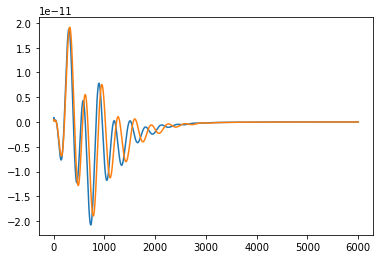

In [5]:
%matplotlib inline
plt.plot(ell_range, training_spectra[0]) # * ell_range * (ell_range + 1) / 2. / np.pi)
plt.plot(ell_range, training_spectra[-1]) # * ell_range * (ell_range + 1) / 2. / np.pi)


In [6]:
with tf.device('/device:GPU:1'):
    test_collection = {}
    test_collection['training_parameters'] = training_parameters
    test_collection['test_parameters'] = test_parameters
    test_collection['training_spectra'] = training_spectra
    test_collection['testing_spectra'] = testing_spectra
    import pickle
    f = open('test_collection_C_te_200k.pkl', 'wb')
    pickle.dump(test_collection, f)
    f.close()

In [ ]:
##Only for Google Colab
!git clone https://github.com/keirkwame/axionEmu.git

In [ ]:
print(training_spectra)
print(np.sum(np.isfinite(training_spectra)))
print(160000 * 5999)


In [7]:
with tf.device('/device:GPU:1'): # ensures we are running on a GPU

    PCA_batch_size = 8000
    n_PCA_batch = mh.ceil(training_parameters['omega_b'].shape[0] / PCA_batch_size)
    print('n_PCA_batch =', n_PCA_batch)

    for i in range(n_PCA_batch):
        # Generate npz files for PCA decomposition
        if i < (n_PCA_batch - 1):
            idx_end = (i+1) * PCA_batch_size
        else:
            idx_end = training_parameters['omega_b'].shape[0]
        np.savez_compressed('./training_params_TE_200k_batch%i.npz'%(i+1), omega_b = training_parameters['omega_b'][i*PCA_batch_size: idx_end],
                 omega_cdm = training_parameters['omega_cdm'][i*PCA_batch_size: idx_end],
                 h = training_parameters['h'][i*PCA_batch_size: idx_end],
                 tau_reio = training_parameters['tau_reio'][i*PCA_batch_size: idx_end],
                 n_s = training_parameters['n_s'][i*PCA_batch_size: idx_end],
                 ln10A_s = training_parameters['ln10A_s'][i*PCA_batch_size: idx_end],
                 log10ma = training_parameters['log10ma'][i*PCA_batch_size: idx_end],
                 omega_ax = training_parameters['omega_ax'][i*PCA_batch_size: idx_end])
    
        npzfile = np.load('./training_params_TE_200k_batch%i.npz'%(i+1))
        print(npzfile.files, npzfile['omega_b'].shape)
    
        np.savez_compressed('./training_feature_TE_200k_batch%i.npz'%(i+1), mode = np.linspace(2,6000,5999), 
                 features = training_spectra[i*PCA_batch_size: idx_end, :])
    
        npzfile = np.load('./training_feature_TE_200k_batch%i.npz'%(i+1))
        print(npzfile.files, npzfile['features'].shape)

'''    # Generate npz files for PCA decomposition
    np.savez_compressed('./training_params_TE_200k_set2.npz', omega_b = training_parameters['omega_b'][80000:], 
             omega_cdm = training_parameters['omega_cdm'][80000:],
             h = training_parameters['h'][80000:],
             tau_reio = training_parameters['tau_reio'][80000:],
             n_s = training_parameters['n_s'][80000:],
             ln10A_s = training_parameters['ln10A_s'][80000:],
             log10ma = training_parameters['log10ma'][80000:],
             omega_ax = training_parameters['omega_ax'][80000:])

    npzfile = np.load('./training_params_TE_200k_set2.npz')
    print(npzfile.files, npzfile['omega_b'].shape[0])

    np.savez_compressed('./training_feature_TE_200k_set2.npz', mode = np.linspace(2,6000,5999), 
             features = training_spectra[80000:, :])

    npzfile = np.load('./training_feature_TE_200k_set2.npz')
    print(npzfile.files, npzfile['features'].shape[0])
'''


n_PCA_batch = 20
['omega_b', 'omega_cdm', 'h', 'tau_reio', 'n_s', 'ln10A_s', 'log10ma', 'omega_ax'] (8000,)
['mode', 'features'] (8000, 5999)
['omega_b', 'omega_cdm', 'h', 'tau_reio', 'n_s', 'ln10A_s', 'log10ma', 'omega_ax'] (8000,)
['mode', 'features'] (8000, 5999)
['omega_b', 'omega_cdm', 'h', 'tau_reio', 'n_s', 'ln10A_s', 'log10ma', 'omega_ax'] (8000,)
['mode', 'features'] (8000, 5999)
['omega_b', 'omega_cdm', 'h', 'tau_reio', 'n_s', 'ln10A_s', 'log10ma', 'omega_ax'] (8000,)
['mode', 'features'] (8000, 5999)
['omega_b', 'omega_cdm', 'h', 'tau_reio', 'n_s', 'ln10A_s', 'log10ma', 'omega_ax'] (8000,)
['mode', 'features'] (8000, 5999)
['omega_b', 'omega_cdm', 'h', 'tau_reio', 'n_s', 'ln10A_s', 'log10ma', 'omega_ax'] (8000,)
['mode', 'features'] (8000, 5999)
['omega_b', 'omega_cdm', 'h', 'tau_reio', 'n_s', 'ln10A_s', 'log10ma', 'omega_ax'] (8000,)
['mode', 'features'] (8000, 5999)
['omega_b', 'omega_cdm', 'h', 'tau_reio', 'n_s', 'ln10A_s', 'log10ma', 'omega_ax'] (8000,)
['mode', 'feature

"    # Generate npz files for PCA decomposition\n    np.savez_compressed('./training_params_TE_200k_set2.npz', omega_b = training_parameters['omega_b'][80000:], \n             omega_cdm = training_parameters['omega_cdm'][80000:],\n             h = training_parameters['h'][80000:],\n             tau_reio = training_parameters['tau_reio'][80000:],\n             n_s = training_parameters['n_s'][80000:],\n             ln10A_s = training_parameters['ln10A_s'][80000:],\n             log10ma = training_parameters['log10ma'][80000:],\n             omega_ax = training_parameters['omega_ax'][80000:])\n\n    npzfile = np.load('./training_params_TE_200k_set2.npz')\n    print(npzfile.files, npzfile['omega_b'].shape[0])\n\n    np.savez_compressed('./training_feature_TE_200k_set2.npz', mode = np.linspace(2,6000,5999), \n             features = training_spectra[80000:, :])\n\n    npzfile = np.load('./training_feature_TE_200k_set2.npz')\n    print(npzfile.files, npzfile['features'].shape[0])\n"

In [14]:
#Train PCA decomposition
with tf.device('/device:GPU:1'): # ensures we are running on a GPU
    n_pcas = 512
    from cosmopower import cosmopower_PCA

    cp_pca = cosmopower_PCA(parameters=model_parameters,
                            modes=ell_range,
                            n_pcas=n_pcas,
                            parameters_filenames=['./training_params_TE_200k_batch%i'%(i+1) for i in range(6)], #'./training_params_TE_200k_set2'],
                            features_filenames=['./training_feature_TE_200k_batch%i'%(i+1) for i in range(6)], # './training_feature_TE_200k_set2'],
                            verbose=True, # useful to follow the various steps
                            )

    cp_pca.transform_and_stack_training_data()



Initialized cosmopower_PCA compression with 512 components 

starting PCA compression


100%|██████████| 6/6 [06:20<00:00, 63.41s/it]


PCA compression done
parameters and PCA coefficients of training set stored in memory


In [ ]:
# instantiate NN class
with tf.device('/device:GPU:1'): # ensures we are running on a GPU
    from axionEmu.cosmopower import cosmopower_PCAplusNN
    cp_nn = cosmopower_PCAplusNN(cp_pca=cp_pca,
                      n_hidden = [64, 512, 512, 512,512], # 4 hidden layers, each with 512 nodes
                      verbose=True, # useful to understand the different steps in initialisation and training
                      )


In [ ]:
#import tensorflow as tf
with tf.device('/device:GPU:1'): # ensures we are running on a GPU
    # train
    cp_nn.train(filename_saved_model='TE_lensed_NL_NN_axion_200k_all_batches',
                # cooling schedule
                validation_split=0.1,
                learning_rates=[1e-2, 1e-3, 1e-4, 1e-5, 1e-6],
                batch_sizes=[1024,1024,1024,1024,1024],
                gradient_accumulation_steps = [1, 1, 1, 1, 1],
                # early stopping set up
                patience_values = [100,100,100,100,100],
                max_epochs = [1000,1000,1000,1000,1000],
                )


In [ ]:
with tf.device('/device:GPU:1'): # ensures we are running on a GPU
    cp_nn = cosmopower_PCAplusNN(restore=True, 
                          restore_filename='TE_lensed_NL_NN_axion',
                          )


In [ ]:
with tf.device('/device:GPU:1'): # ensures we are running on a GPU
    predicted_testing_spectra = cp_nn.predictions_np(test_parameters)
    import matplotlib.pyplot as plt
    from matplotlib import gridspec
    plt.rcParams['font.size'] = '40'
    fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(50,30))
    for j, i in enumerate(np.arange(start=10, stop=13)):
        pred = predicted_testing_spectra[i]*ell_range*(ell_range+1)/(2.*np.pi)
        true = testing_spectra[i]*ell_range*(ell_range+1)/(2.*np.pi)
        ax[j].semilogx(ell_range, true, 'blue', label = 'Original')
        ax[j].semilogx(ell_range, pred, 'red', label = 'NN reconstructed', linestyle='--')
        ax[j].set_xlabel('$\ell$', fontsize='x-large')
        ax[j].set_ylabel('$C_\ell$', fontsize='x-large')
        ax[j].legend(fontsize=15)
    plt.savefig('examples_reconstruction_TE_lensed_axion_no_nan.pdf')


In [ ]:
print(np.sum(np.isnan(spectra_)) / np.size(spectra_))
print(parameters_list.keys())
for i in range(10000): #spectra_.shape[0]):
    if np.sum(np.isnan(spectra_[i])):
        plt.scatter(np.log10(parameters_list['ma'][i]), parameters_list['omega_ax'][i])


In [ ]:
print(np.sum(np.isnan(spectra_)) / np.size(spectra_))
print(parameters_list.keys())
plt.xlabel('log10ma')
plt.ylabel('omega-ax')
for i in range(1000): #spectra_.shape[0]):
    if not np.sum(np.isnan(spectra_[i])):
        plt.scatter(np.log10(parameters_list['ma'][i]), parameters_list['omega_ax'][i])


In [ ]:
#Remove nan spectra
spectra_bool = np.array(np.sum(np.isnan(spectra_), axis=1), dtype=bool)
print(spectra_bool)
print(np.sum(spectra_bool) / spectra_bool.size)
print(spectra_[0])
print(spectra_[1])


In [ ]:
##Only for Google Colab
!git clone https://github.com/simonsobs/so_noise_models

In [ ]:
with tf.device('/device:GPU:1'): # ensures we are running on a GPU
    #load noise models from the SO noise repo
    '''noise_levels_load = np.loadtxt('./so_noise_models/LAT_comp_sep_noise/v3.1.0/SO_LAT_Nell_T_atmv1_goal_fsky0p4_ILC_CMB.txt')
    conv_factor = (2.7255e6)**2

    ells = noise_levels_load[:, 0]
    SO_TT_noise = noise_levels_load[:, 1][:np.max(ell_range)+1-40] / conv_factor ##6001-40
    new_ells = ells[:np.max(ell_range)+1-40] ##6001-40

    f_sky = 0.4'''
    prefac = 1. #np.sqrt(2/(f_sky*(2*new_ells+1)))

    ##Cut off some spectra
    #print(new_ells)
    #print(prefac.shape, testing_spectra.shape, SO_TT_noise.shape)
    #testing_spectra = testing_spectra[:6001-40]

    denominator = prefac*testing_spectra[:, :]  # use all of them #+SO_TT_noise #38:
    diff = np.abs((predicted_testing_spectra[:, :] - testing_spectra[:, :])/(denominator))

    # Compute percentiles
    percentiles = np.zeros((4, diff.shape[1]))

    percentiles[0] = np.percentile(diff, 68, axis = 0)
    percentiles[1] = np.percentile(diff, 95, axis = 0)
    percentiles[2] = np.percentile(diff, 99, axis = 0)
    percentiles[3] = np.percentile(diff, 99.9, axis = 0)

    plt.figure(figsize=(12, 9))
    plt.fill_between(ell_range, 0, percentiles[2,:], color = 'salmon', label = '99%', alpha=0.8)
    plt.fill_between(ell_range, 0, percentiles[1,:], color = 'red', label = '95%', alpha = 0.7)
    plt.fill_between(ell_range, 0, percentiles[0,:], color = 'darkred', label = '68%', alpha = 1)

    # plt.ylim(0, 0.2)

    plt.legend(frameon=False, fontsize=30, loc='upper left')
    plt.ylabel(r'$\frac{| C_{\ell, \rm{emulated}}^{\rm{TE}} - C_{\ell, \rm{true}}^{\rm{TE}}|} {C_{\ell, \rm{CMB}}^{\rm{TE}}}$', fontsize=50)
    plt.xlabel(r'$\ell$',  fontsize=50)

    plt.axhline(y=0.01)
    #plt.axvline(x=np.log10(40))
    plt.yscale('log')

    ax = plt.gca()
    ax.xaxis.set_major_locator(plt.MaxNLocator(10))
    ax.yaxis.set_major_locator(plt.MaxNLocator(5))

    plt.setp(ax.get_xticklabels(), fontsize=25)
    plt.setp(ax.get_yticklabels(), fontsize=25)
    plt.tight_layout()
    plt.savefig('./accuracy_emu_TE_lensed_axion.pdf')

    diff_=np.sum(diff,axis = 1)
    print('diff_.shape is ', diff_.shape)
    sort_index = np.argsort(diff_)
    bad_params = dict()
    for key in test_parameters:
        bad_params[key] = []
    for i in sort_index[len(sort_index)-100:]:
        for key in test_parameters:
            bad_params[key].append(test_parameters[key][i])
    fig, ax = plt.subplots(nrows=1, ncols=8, figsize=(50,10))
    for i in range(8):
        pa =list(test_parameters.keys())[i]
        h = bad_params[pa]
        ax[i].plot(h, 'o')
        ax[i].set_ylabel(pa, fontsize='x-large')
    plt.savefig('bad_params_TE_lensed_axion.pdf')
